In [ ]:
import torch
#has_mps = torch.backends.mps.is_built()
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [ ]:
!pip install -q seaborn

In [ ]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import datasets, metrics

In [ ]:
df = pd.read_csv("/src/src/injury_shield/data/week_approach_maskedID_timeseries.csv")
np.random.seed(0)

In [ ]:
df.describe()

,nr. sessions,nr. rest days,total kms,max km one day,total km Z3-Z4-Z5-T1-T2,"nr. tough sessions (effort in Z5, T1 or T2)",nr. days with interval session,total km Z3-4,max km Z3-4 one day,total km Z5-T1-T2,...,max training success.2,avg recovery.2,min recovery.2,max recovery.2,Athlete ID,injury,rel total kms week 0_1,rel total kms week 0_2,rel total kms week 1_2,Date
count,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,...,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,4.279800e+04,4.279800e+04,4.279800e+04,42798.000000
mean,5.809337,1.874667,49.543911,14.009255,9.433621,0.930184,1.672531,4.859398,3.456888,4.063970,...,0.525709,0.255089,0.184927,0.343522,34.538249,0.013435,4.408628e+05,9.014685e+05,4.803623e+05,1227.733422
std,2.484234,1.853287,36.715017,9.071678,8.887120,1.040631,1.263528,6.984670,4.577423,5.645305,...,0.390604,0.153214,0.127996,0.219536,19.020826,0.115130,4.328234e+06,6.945503e+06,4.656806e+06,806.495152
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,5.000000,1.000000,22.800000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.150000,0.110000,0.170000,20.000000,0.000000,6.955245e-01,6.723968e-01,6.923077e-01,437.000000
50%,6.000000,1.000000,44.800000,13.400000,8.000000,1.000000,2.000000,0.000000,0.000000,1.500000,...,0.730000,0.220000,0.160000,0.310000,34.000000,0.000000,9.891862e-01,1.001431e+00,9.897523e-01,1254.000000
75%,7.000000,3.000000,70.100000,18.300000,14.600000,2.000000,3.000000,8.000000,6.300000,6.300000,...,0.840000,0.360000,0.240000,0.520000,50.000000,0.000000,1.320515e+00,1.422171e+00,1.327586e+00,1913.000000
max,14.000000,7.000000,242.000000,131.000000,100.000000,6.000000,7.000000,79.800000,75.000000,80.000000,...,1.000000,0.900000,0.900000,1.000000,73.000000,1.000000,2.096000e+08,2.176000e+08,2.096000e+08,2673.000000


In [ ]:
# Drop less important features (columns)
df.info()
df = df.drop(['avg training success.1', 'max training success.1', 'min training success.1', 'avg training success.2', 'max training success.2', 'min training success.2'], axis=1)
df = df.drop(['avg exertion.1', 'min exertion.1', 'max exertion.1', 'avg exertion.2', 'min exertion.2', 'max exertion.2'], axis=1)
df = df.drop(['avg recovery.1', 'min recovery.1', 'max recovery.1', 'avg recovery.2', 'min recovery.2', 'max recovery.2', 'rel total kms week 0_1', 'rel total kms week 0_2', 'rel total kms week 1_2'], axis=1)
df = df.drop(['nr. sessions.1', 'nr. rest days.1', 'total kms.1', 'max km one day.1', 'total km Z3-Z4-Z5-T1-T2.1', 'nr. tough sessions (effort in Z5, T1 or T2).1', 'nr. days with interval session.1', 'total km Z3-4.1', 'max km Z3-4 one day.1', 'total km Z5-T1-T2.1', 'max km Z5-T1-T2 one day.1', 'total hours alternative training.1', 'nr. strength trainings.1', 'nr. sessions.2', 'nr. rest days.2', 'total kms.2', 'max km one day.2', 'total km Z3-Z4-Z5-T1-T2.2', 'nr. tough sessions (effort in Z5, T1 or T2).2', 'nr. days with interval session.2', 'total km Z3-4.2', 'max km Z3-4 one day.2', 'total km Z5-T1-T2.2', 'max km Z5-T1-T2 one day.2', 'total hours alternative training.2', 'nr. strength trainings.2'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42798 entries, 0 to 42797
Data columns (total 72 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   nr. sessions                                   42798 non-null  float64
 1   nr. rest days                                  42798 non-null  float64
 2   total kms                                      42798 non-null  float64
 3   max km one day                                 42798 non-null  float64
 4   total km Z3-Z4-Z5-T1-T2                        42798 non-null  float64
 5   nr. tough sessions (effort in Z5, T1 or T2)    42798 non-null  float64
 6   nr. days with interval session                 42798 non-null  float64
 7   total km Z3-4                                  42798 non-null  float64
 8   max km Z3-4 one day                            42798 non-null  float64
 9   total km Z5-T1-T2                              427

In [ ]:
# Correlation matrix --> good to visualize
correlation_matrix = df.corr()
target_correlation = correlation_matrix['injury'].sort_values(ascending=False)
print(target_correlation)

injury                                         1.000000
max exertion                                   0.051565
avg exertion                                   0.048771
max recovery                                   0.043163
max training success                           0.038485
avg training success                           0.035395
avg recovery                                   0.033640
Date                                           0.029498
nr. days with interval session                 0.029442
nr. sessions                                   0.029381
nr. strength trainings                         0.028734
total km Z3-Z4-Z5-T1-T2                        0.027755
min exertion                                   0.025109
nr. tough sessions (effort in Z5, T1 or T2)    0.024212
min training success                           0.023267
total km Z5-T1-T2                              0.023045
max km Z5-T1-T2 one day                        0.020815
min recovery                                   0

In [ ]:
# Unique athlete (74)
df['Athlete ID'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73])

In [ ]:
# Data set normalization
features = df.drop(['Athlete ID', 'injury', 'Date'], axis=1)
labels = df['injury']

scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)
features_normalized_df = pd.DataFrame(features_normalized, index=features.index, columns=features.columns)
df_normalized = pd.concat([df[['Athlete ID', 'Date']], features_normalized_df, labels], axis=1)

In [ ]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42798 entries, 0 to 42797
Data columns (total 25 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Athlete ID                                   42798 non-null  int64  
 1   Date                                         42798 non-null  int64  
 2   nr. sessions                                 42798 non-null  float64
 3   nr. rest days                                42798 non-null  float64
 4   total kms                                    42798 non-null  float64
 5   max km one day                               42798 non-null  float64
 6   total km Z3-Z4-Z5-T1-T2                      42798 non-null  float64
 7   nr. tough sessions (effort in Z5, T1 or T2)  42798 non-null  float64
 8   nr. days with interval session               42798 non-null  float64
 9   total km Z3-4                                42798 non-null  float64
 10

In [ ]:
# Split the dataset into train and test by Athlete ID
athlete_ids = df_normalized['Athlete ID'].unique()

# Shuffle the athlete IDs to randomize selection
np.random.seed(42)
np.random.shuffle(athlete_ids)

# Calculate the split index for an 80-20 split
split_index = int(len(athlete_ids) * 0.8)

# Split the athlete IDs into training and test groups
train_athlete_ids = athlete_ids[:split_index]
test_athlete_ids = athlete_ids[split_index:]

# Split the DataFrame based on the selected athlete IDs
train_df = df_normalized[df_normalized['Athlete ID'].isin(train_athlete_ids)]
test_df = df_normalized[df_normalized['Athlete ID'].isin(test_athlete_ids)]

In [ ]:
# Dataset generation
import torch
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

def create_dataset(dataframe, sequence_length=200):
  sequences = []
  targets = []
  for athlete_id in dataframe['Athlete ID'].unique():
    athlete_data = dataframe[dataframe['Athlete ID'] == athlete_id]

    for start_idx in range(len(athlete_data) - sequence_length + 1):
      end_idx = start_idx + sequence_length
      seq = athlete_data.iloc[start_idx:end_idx, 1:-1].values # Exclude Athlete ID and label from features
      target = athlete_data.iloc[start_idx:end_idx, -1].values[-1]
      sequences.append(seq)
      targets.append(target)

  return np.array(sequences), np.array(targets)

def create_dataloader(sequences, targets, batch_size=64):
  sequence_tensor = torch.tensor(sequences, dtype=torch.float)
  target_tensor = torch.tensor(targets, dtype=torch.float)
  dataset = TensorDataset(sequence_tensor, target_tensor)
  return DataLoader(dataset, batch_size = batch_size, shuffle=True)


train_sequences, train_targets = create_dataset(train_df, sequence_length=40)  # time window size [20-100]
test_sequences, test_targets = create_dataset(test_df, sequence_length=40)

train_loader = create_dataloader(train_sequences, train_targets, batch_size=64)
test_loader = create_dataloader(test_sequences, test_targets, batch_size=64)

In [ ]:
import torch
import torch.nn as nn

class InjuryPredictionLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(InjuryPredictionLSTM, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)  # Predicting the injury

    def forward(self, x):
        # Initialize hidden state and cell state
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))  # out: tensor of shape (batch_size, seq_length, hidden_size)

        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :])
        return out

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = InjuryPredictionLSTM(input_size=23, hidden_size=128, num_layers=2, num_classes=1)
model.to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 20  # original is 20 epoch
for epoch in range(num_epochs):
    for i, (sequences, labels) in enumerate(train_loader):
        sequences, labels = sequences.to(device), labels.to(device)

        # Forward pass
        outputs = model(sequences)
        loss = criterion(outputs.squeeze(), labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/20], Loss: 0.0103
Epoch [2/20], Loss: 0.0076


In [ ]:
model.eval()  # Set the model to evaluation mode
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

with torch.no_grad():
    correct = 0
    total = 0
    for sequences, labels in test_loader:
        sequences, labels = sequences.to(device), labels.to(device)
        outputs = model(sequences)
        predicted = torch.round(torch.sigmoid(outputs.squeeze()))
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy of the model on the test sequences: {100 * correct / total} %')

Accuracy of the model on the test sequences: 98.98533345632322 %


Precision: 1.0
Recall: 0.20863309352517986
ROC-AUC: 0.8971280833677293


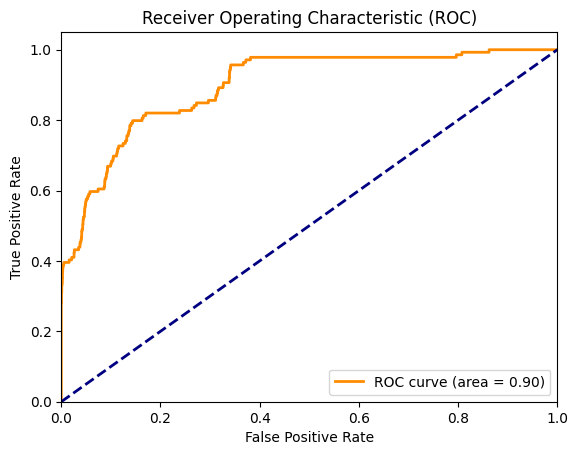

In [ ]:
# Precision and recall
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

model.eval()  # Set the model to evaluation mode
model.to(device)

with torch.no_grad():
    all_predictions = []
    all_labels = []
    all_probabilities = []
    for sequences, labels in test_loader:
        sequences, labels = sequences.to(device), labels.to(device)
        outputs = model(sequences)
        probabilities = torch.sigmoid(outputs.squeeze()).cpu().numpy()
        predicted = torch.round(torch.sigmoid(outputs.squeeze()))

        # Store probabilities for ROC calculation
        all_probabilities.extend(probabilities)
        # Store predictions and labels for other calculations
        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate precision and recall
precision = precision_score(all_labels, all_predictions)
recall = recall_score(all_labels, all_predictions)

# Calculate the ROC-AUC
roc_auc = roc_auc_score(all_labels, all_probabilities)

# Display precision, recall, and ROC-AUC
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC-AUC: {roc_auc}")

# Calculate and plot the ROC curve
fpr, tpr, _ = roc_curve(all_labels, all_probabilities)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()